Description of the function id_inter(data, j, plot_var) used for data filtering. 

Usually you read the data with pds4_tool, as shown in 00_2B_stacked.npy. We now start with a .npy version of: 

    CE4_GRAS_LPR-2B_SCI_N_20210604074001_20210606083000_0193_A.2B

In [ ]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2

In [ ]:
# Load SOL_0002 raw data
data_path = 'data/'
data = np.load(data_path + 'sample_SOL_0002.npy')

In [ ]:
def plot_data(datas, title, lims):
  plt.figure(figsize=[20, 10])
  plt.title(title)
  plt.xlabel('Distance [Number of traces]')
  plt.xlabel('Depth [samples]')
  plt.imshow(datas, aspect = 'auto', vmin = -lims, vmax = lims, cmap ='seismic')

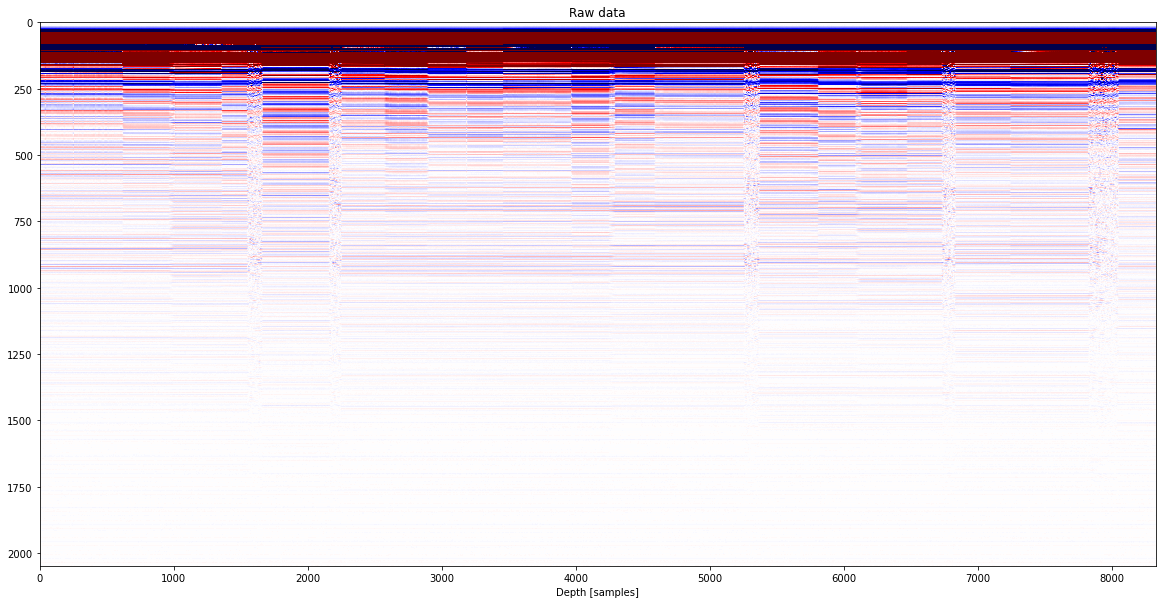

In [ ]:
plot_data(data.T, title = 'Raw data', lims = 50)

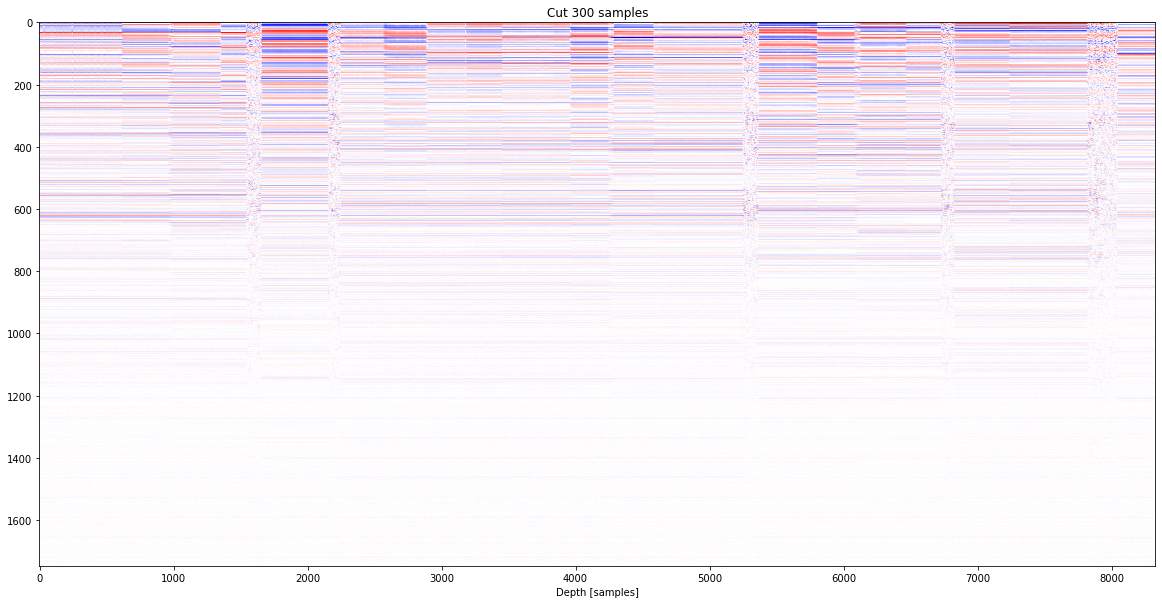

In [ ]:
# do not consider first 300 lines (too high values) and transpose data
img = data.T[300:, :]
plot_data(img, 'Cut 300 samples', 50)

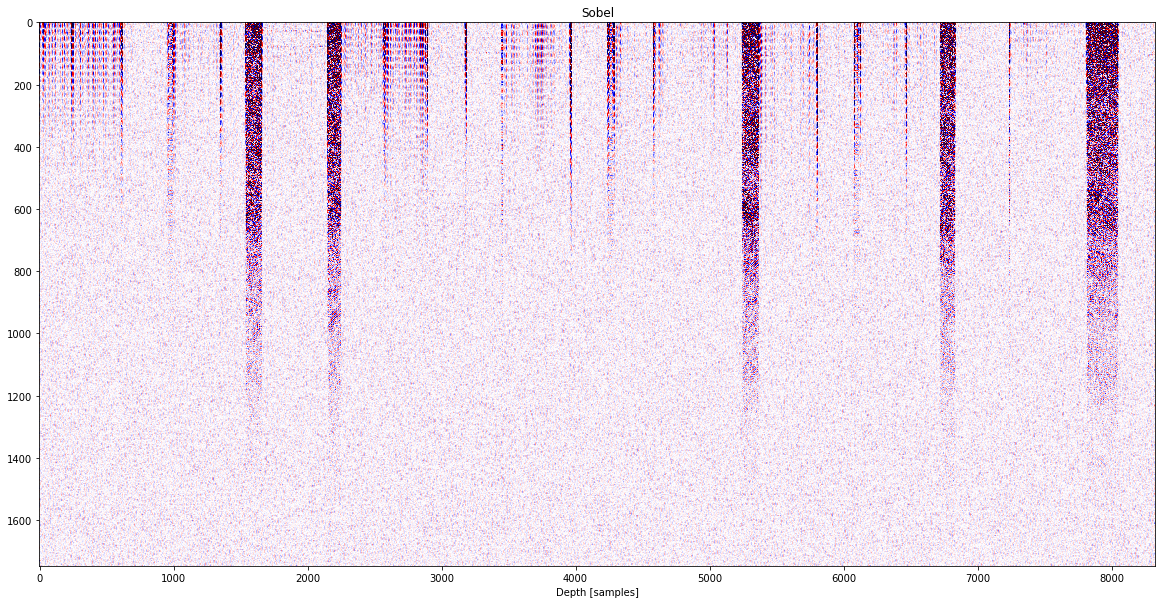

In [ ]:
# compute the derivative of the data in x direction with Sobel with a kernel size of 5
# this should eliminate the horizonatal lines
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plot_data(sobelx, 'Sobel', 50)

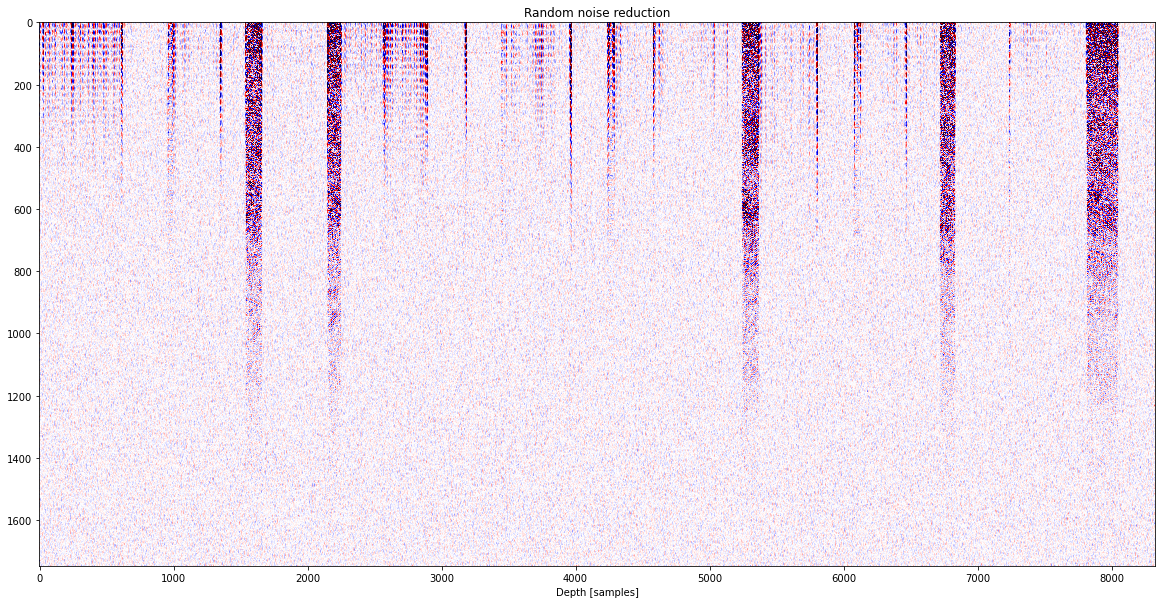

In [ ]:
# denoise the sobelx with a median filter of size 5 
# we need to reduce random noise for the next step
med_denoised = ndimage.median_filter(sobelx, 5)
plot_data(med_denoised, 'Random noise reduction', 50)

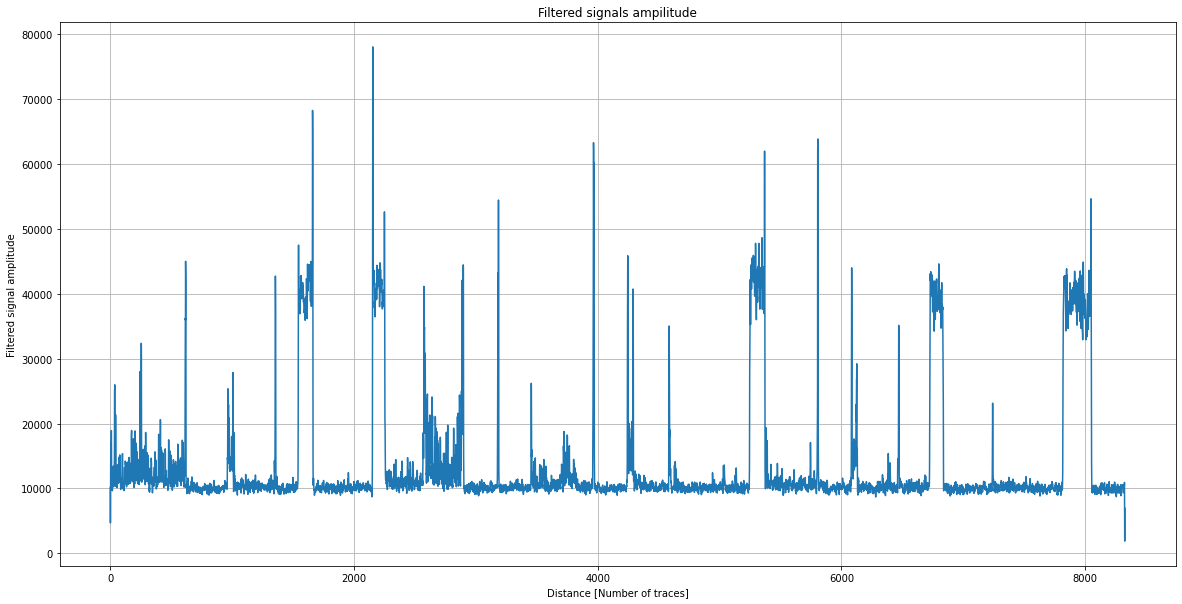

In [ ]:
# sum the absolute values of the denoised traces on time dims
# we should have cancelled signals on death traces --> highest value on the real traces
med = np.sum(np.abs(med_denoised), axis = 0)
plt.figure(figsize=[20, 10])
plt.title('Filtered signals ampilitude')
plt.xlabel('Distance [Number of traces]')
plt.ylabel('Filtered signal amplitude')
plt.grid(True)
plt.plot(med)

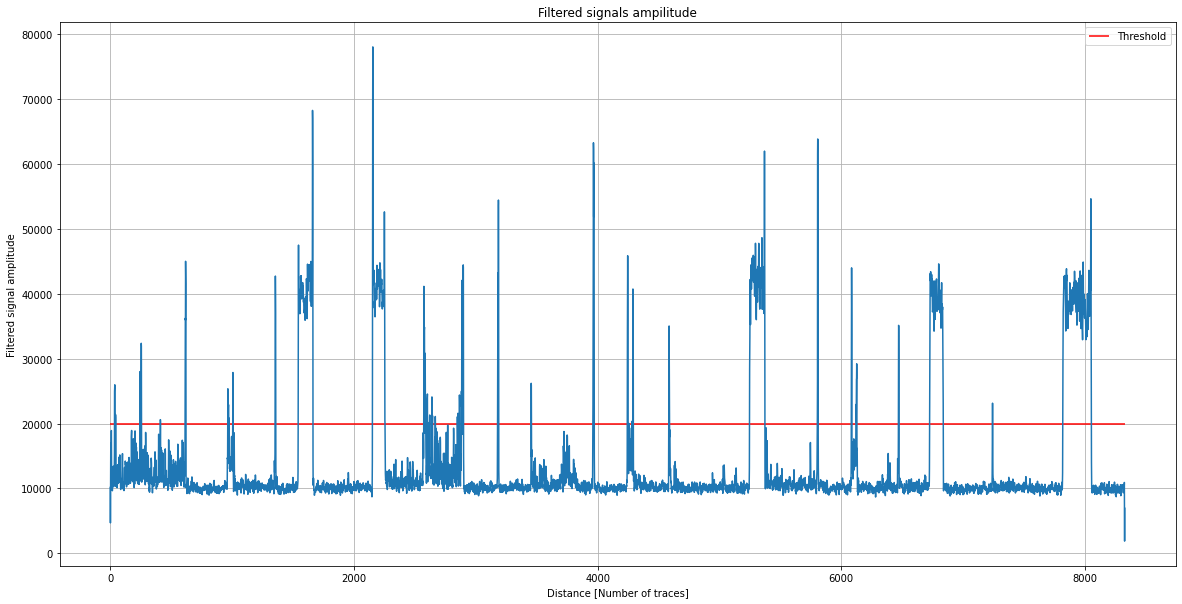

In [ ]:
## define a moving window to avoid taking into account small portions with high values.
## we want to take the signals only when it has a value highest than thres for window consecutive traces
window = 25
thres = 20000

plt.figure(figsize=[20, 10])
plt.title('Filtered signals ampilitude')
plt.xlabel('Distance [Number of traces]')
plt.ylabel('Filtered signal amplitude')
plt.grid(True)
plt.plot(med)
plt.hlines([thres], 0, med.shape[0], color = 'r', label = 'Threshold')
plt.legend()

In [ ]:
## check previous condiction and create filter with 0s and 1s
## init output vector as 0s
medf = np.zeros(med.shape)
## for each trace
for i in range(med.shape[0] - window):
	## if all values are > thres
	if np.all(med[i : i + window] > thres):
		## replace 0 with 1 in the output vector
		medf[i : i + window] = 1

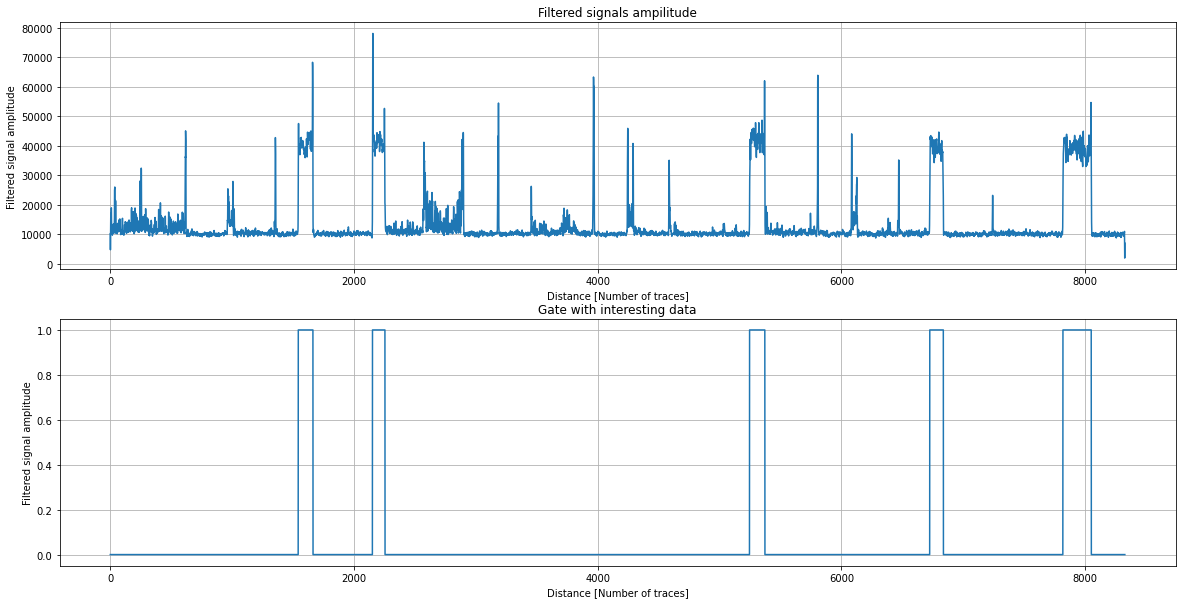

In [ ]:
plt.figure(figsize=[20, 10])
plt.subplot(211)
plt.grid(True)
plt.title('Filtered signals ampilitude')
plt.xlabel('Distance [Number of traces]')
plt.ylabel('Filtered signal amplitude')
plt.plot(med)
plt.subplot(212)
plt.grid(True)
plt.title('Gate with interesting data')
plt.xlabel('Distance [Number of traces]')
plt.ylabel('Filtered signal amplitude')
plt.plot(medf)

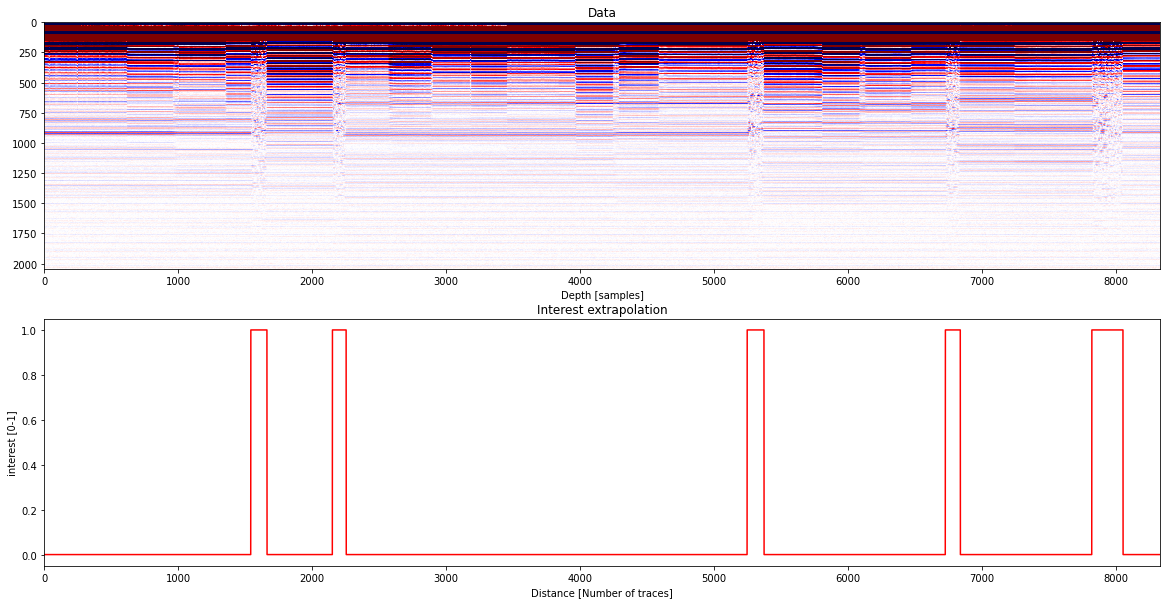

In [ ]:
plt.figure(figsize=[20, 10])
plt.title('Raw data')
plt.subplot(211)
plt.title('Data')
plt.imshow(data.T, cmap = 'seismic', vmin = -10, vmax = 10, aspect = 'auto')
plt.xlabel('Distance [Number of traces]')
plt.xlabel('Depth [samples]')
plt.subplot(212)
plt.title('Interest extrapolation')
plt.xlim(0, sobelx.shape[1])
plt.xlabel('Distance [Number of traces]')
plt.ylabel('interest [0-1]')
plt.plot(medf, 'r')

In [ ]:
##restore filtered data
# find when idx == 1
idx = np.where(medf==1)[0]
data_filtered = data[idx, :]
print('Raw data shape was: \n')
print(data.shape)
print('\nFiltered data shape is: \n')
print(data_filtered.shape)

Raw data shape was: 

(8328, 2048)

Filtered data shape is: 

(695, 2048)


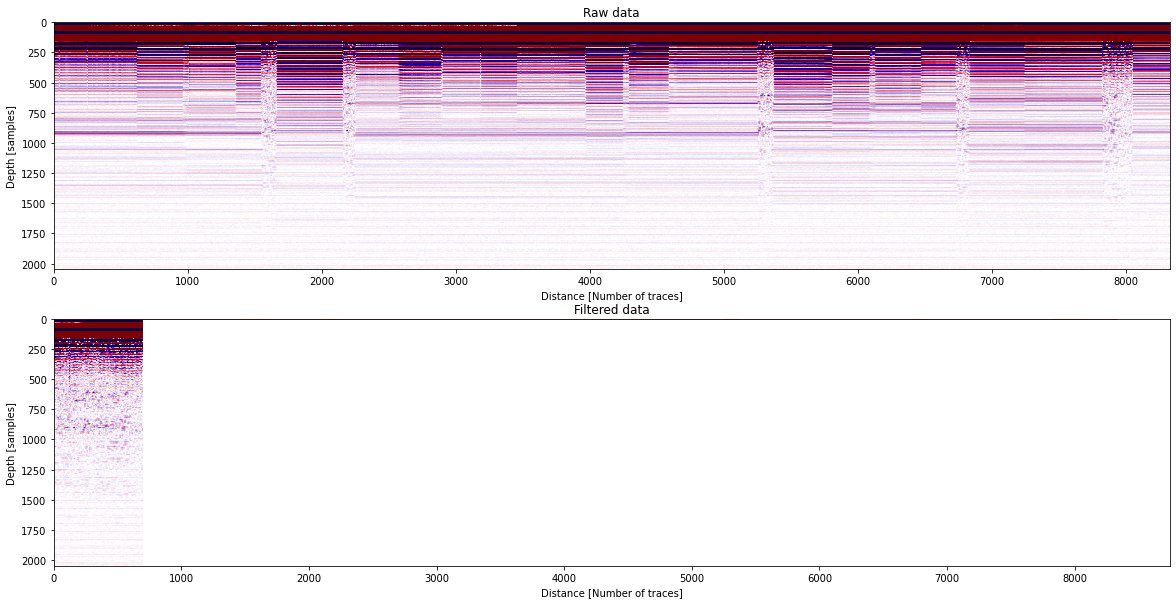

In [44]:
plt.figure(figsize=[20, 10])
plt.subplot(211)
plt.title('Raw data')
plt.imshow(data.T, cmap = 'seismic', vmin = -10, vmax = 10, aspect = 'auto')
plt.xlabel('Distance [Number of traces]')
plt.ylabel('Depth [samples]')
plt.subplot(212)
plt.title('Filtered data')
plt.imshow(data_filtered.T, cmap = 'seismic', vmin = -10, vmax = 10, aspect = 'auto')
plt.xlabel('Distance [Number of traces]')
plt.ylabel('Depth [samples]')
plt.plot(medf, 'r')